In [28]:
import pandas as pd
import requests

#Importamos los datos directo de la API

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Hacer la solicitud y cargar el JSON
response = requests.get(url)
data_json = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data_json)

# Visualizar las primeras filas
df.head()



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}"
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}"
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}"
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}"
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 83.9, 'Total': '267.4'}}"


In [ ]:
#Verificamos los valores nulos
df.isnull().sum()

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [29]:
# Mostrar todo el contenido sin recortes
pd.set_option('display.max_colwidth', None)

#Imprimimos completo

# Lista de columnas que contienen diccionarios
cols_dict = ['customer', 'phone', 'internet', 'account', 'account_Charges']  # agregá más si hay otras

for col in cols_dict:
    if col in df.columns:
        # Expandir la columna en subcolumnas
        expanded = df[col].apply(pd.Series)

        # Renombrar las columnas para evitar conflictos
        expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
        
        # Concatenar al DataFrame y eliminar la columna original
        df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [30]:
# Detectar columnas binarias
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

# Convertir a binario (usando map si es Yes/No, Male/Female, etc.)
for col in binary_cols:
    unique_vals = df[col].dropna().unique()
    
    if set(unique_vals) == set(['Yes', 'No']):
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    elif set(unique_vals) == set(['Male', 'Female']):
        df[col] = df[col].map({'Male': 1, 'Female': 0})
    else:
        # Codificación genérica si tiene otros dos valores
        df[col] = pd.factorize(df[col])[0]
        
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,No,1,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,0,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,0,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,1,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,1,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,No,1,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [ ]:
#Verificamos valores unicos

df['phone_MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
#reemplazamos para convertirla en binaria

df['phone_MultipleLines'] = df['phone_MultipleLines'].replace('No phone service', 'No')

In [33]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [ ]:
#verificamos todos juntos los valores unicos de las columnas que no fueron convertidas

pd.set_option('display.max_colwidth', None)  # muestra todo el contenido de cada celda
pd.set_option('display.max_rows', 200)       # aumenta la cantidad de filas visibles
pd.set_option('display.max_columns', 100)    # aumenta columnas visibles si usás print(df)

df_seleccion = df[[
    'Churn',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaymentMethod'
]]

for col in df_seleccion:
    print(f"🔹 {col} ({df[col].nunique()} únicos):")
    
    try:
        uniques = df[col].dropna().unique()
        for val in uniques:
            print(f"   • {val}")
    except TypeError as e:
        print(f"   [⚠️ No se pudo mostrar: {e}]")
    
    print("-" * 60)


🔹 Churn (3 únicos):
   • No
   • Yes
   • 
------------------------------------------------------------
🔹 phone_MultipleLines (2 únicos):
   • No
   • Yes
------------------------------------------------------------
🔹 internet_InternetService (3 únicos):
   • DSL
   • Fiber optic
   • No
------------------------------------------------------------
🔹 internet_OnlineSecurity (3 únicos):
   • No
   • Yes
   • No internet service
------------------------------------------------------------
🔹 internet_OnlineBackup (3 únicos):
   • Yes
   • No
   • No internet service
------------------------------------------------------------
🔹 internet_DeviceProtection (3 únicos):
   • No
   • Yes
   • No internet service
------------------------------------------------------------
🔹 internet_TechSupport (3 únicos):
   • Yes
   • No
   • No internet service
------------------------------------------------------------
🔹 internet_StreamingTV (3 únicos):
   • Yes
   • No
   • No internet service
------------

In [ ]:
#reemplazamos valores erroneos

df['internet_OnlineSecurity'] = df['internet_OnlineSecurity'].replace('No phone service', 'No')
df['internet_OnlineBackup'] = df['internet_OnlineBackup'].replace('No phone service', 'No')
df = df[df['internet_InternetService'].notna() & (df['internet_InternetService'] != 'No') & (df['internet_InternetService'].str.strip() != '')]
df = df[df['Churn'].notna() & (df['Churn'].str.strip() != '')]

In [ ]:
#Volvemos a verificar

import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

df_seleccion = df[[
    'Churn',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaymentMethod'
]]

for col in df_seleccion.columns:
    n_uniques = df_seleccion[col].nunique(dropna=True)
    if n_uniques > 2:
        print(f"🔹 {col} ({n_uniques} únicos):")
        
        try:
            uniques = df_seleccion[col].dropna().unique()
            for val in uniques:
                print(f"   • {val}")
        except TypeError as e:
            print(f"   [⚠️ No se pudo mostrar: {e}]")
        
        print("-" * 60)


🔹 account_Contract (3 únicos):
   • One year
   • Month-to-month
   • Two year
------------------------------------------------------------
🔹 account_PaymentMethod (4 únicos):
   • Mailed check
   • Electronic check
   • Credit card (automatic)
   • Bank transfer (automatic)
------------------------------------------------------------


In [ ]:
#verificamos valores vacios

for col in df.columns:
    nulos = df[col].isnull().sum()
    vacios = df[col].astype(str).str.strip().eq('').sum()
    total = nulos + vacios
    if total > 0:
        print(f"🔍 {col}: {nulos} nulos + {vacios} vacíos = {total} ausentes")


🔍 account_Charges_Total: 0 nulos + 5 vacíos = 5 ausentes


In [39]:
for col in df.columns:
    vacios = df[col].astype(str).str.strip() == ''
    if vacios.sum() > 0:
        print(f"🔸 Columna '{col}' tiene {vacios.sum()} valores vacíos ('')")


🔸 Columna 'account_Charges_Total' tiene 5 valores vacíos ('')


In [40]:
df[df['account_Charges_Total'].astype(str).str.strip() == '']


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,0,0,1,1,0,0,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,
1955,2775-SEFEE,No,1,0,0,1,0,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,1,Bank transfer (automatic),61.90,
2930,4075-WKNIU,No,0,0,1,1,0,1,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,
3203,4472-LVYGI,No,0,0,1,1,0,0,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,0,0,1,1,0,1,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,


In [ ]:
#eliminamos los registros con valores faltantes

df = df[~df['account_Charges_Total'].astype(str).str.strip().eq('')]


In [43]:
for col in df.columns:
    vacios = df[col].astype(str).str.strip() == ''
    if vacios.sum() > 0:
        print(f"🔸 Columna '{col}' tiene {vacios.sum()} valores vacíos ('')")


In [46]:
#Creamos la columna "Cuentas_Diarias"

df['Cuentas_Diarias'] = round((df['account_Charges_Monthly'].astype(float)/30),2)
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,1,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,0,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,0,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,1,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,1,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,1,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [50]:
#Estandarizacion de los datos
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Reemplazar valores textuales "Sí" y "No" por binarios
df = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# 2. Renombrar columnas para mayor claridad y comprensión
df = df.rename(columns={
    'Churn': 'abandono',
    'phone_MultipleLines': 'varias_lineas_tel',
    'internet_InternetService': 'tipo_internet',
    'internet_OnlineSecurity': 'seguridad_online',
    'internet_OnlineBackup': 'respaldo_online',
    'internet_DeviceProtection': 'proteccion_dispositivo',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'streaming_tv',
    'internet_StreamingMovies': 'streaming_peliculas',
    'account_Contract': 'tipo_contrato',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Monthly': 'cargos_mensuales',
    'account_Charges_Total': 'cargos_totales',
    'account_PaperlessBilling': 'factura_digital',
    'customerID': 'id_cliente',
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'mayor_edad',
    'customer_Partner': 'pareja',
    'customer_Dependents': 'dependientes',
    'customer_tenure': 'antiguedad_meses',
    'phone_PhoneService': 'servicio_telefonico',
    'Cuentas_Diarias': 'cuentas_diarias'
})

# 3. Convertir columnas numéricas necesarias a float (si alguna viene como object)
df['cargos_totales'] = pd.to_numeric(df['cargos_totales'], errors='coerce')

# 4. Estandarizar variables numéricas para que todas estén en la misma escala
scaler = StandardScaler()
columnas_numericas = ['cargos_mensuales', 'cargos_totales', 'antiguedad_meses', 'cuentas_diarias']

# Verificamos que estén en el df y no tengan NaNs
columnas_numericas = [col for col in columnas_numericas if col in df.columns and df[col].notna().all()]

df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# (Opcional) Confirmar que está todo limpio
print("✅ Transformación completa. Columnas procesadas:")
print(df.dtypes)


✅ Transformación completa. Columnas procesadas:
id_cliente                 object
abandono                    int64
genero                      int64
mayor_edad                  int64
pareja                      int64
dependientes                int64
antiguedad_meses          float64
servicio_telefonico         int64
varias_lineas_tel           int64
tipo_internet              object
seguridad_online            int64
respaldo_online             int64
proteccion_dispositivo      int64
soporte_tecnico             int64
streaming_tv                int64
streaming_peliculas         int64
tipo_contrato              object
factura_digital             int64
metodo_pago                object
cargos_mensuales          float64
cargos_totales            float64
cuentas_diarias           float64
dtype: object


C:\Users\natal\AppData\Local\Temp\ipykernel_27048\3375842627.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [51]:
#Analisis Descriptivo
df.describe()

,abandono,genero,mayor_edad,pareja,dependientes,antiguedad_meses,servicio_telefonico,varias_lineas_tel,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,factura_digital,cargos_mensuales,cargos_totales,cuentas_diarias
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5.512000e+03,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5.512000e+03,5.512000e+03,5.512000e+03
mean,0.318578,0.503447,0.197750,0.482583,0.265239,1.147284e-16,0.876633,0.476597,0.365566,0.439949,0.438679,0.370102,0.490385,0.495464,0.675435,7.863408e-17,-1.347092e-16,-3.222708e-16
std,0.465967,0.500033,0.398339,0.499742,0.441501,1.000091e+00,0.328888,0.499497,0.481632,0.496426,0.496271,0.482875,0.499953,0.500025,0.468254,1.000091e+00,1.000091e+00,1.000091e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.297888e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.435546e+00,-1.148840e+00,-2.437659e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-9.724546e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.709577e-01,-9.096572e-01,-7.686154e-01
50%,0.000000,1.000000,0.000000,0.000000,0.000000,-1.181924e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.206233e-01,-2.506320e-01,1.206293e-01
75%,1.000000,1.000000,0.000000,1.000000,1.000000,9.394655e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.024204e-01,7.635404e-01,8.046637e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.590332e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.910626e+00,2.528286e+00,1.912799e+00


C:\Users\natal\AppData\Local\Temp\ipykernel_27048\4141696551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='abandono', palette='Set2')


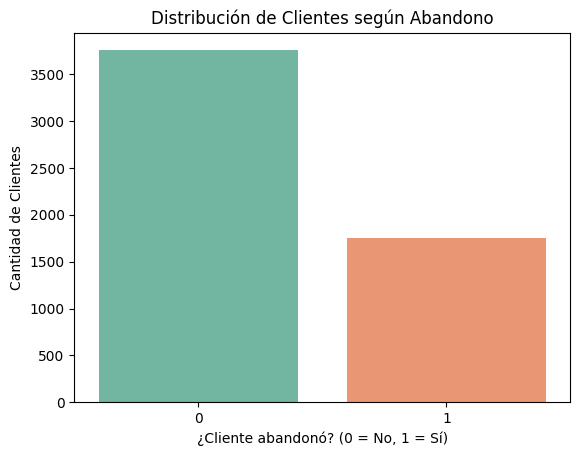

In [53]:
#Distribucion de la variable Abandono

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='abandono', palette='Set2')
plt.title('Distribución de Clientes según Abandono')
plt.xlabel('¿Cliente abandonó? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.show()


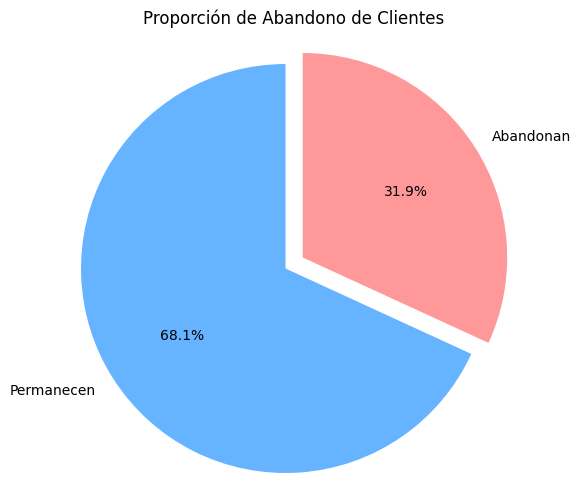

In [54]:
labels = ['Permanecen', 'Abandonan']
sizes = df['abandono'].value_counts(normalize=True) * 100
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Proporción de Abandono de Clientes')
plt.axis('equal')
plt.show()


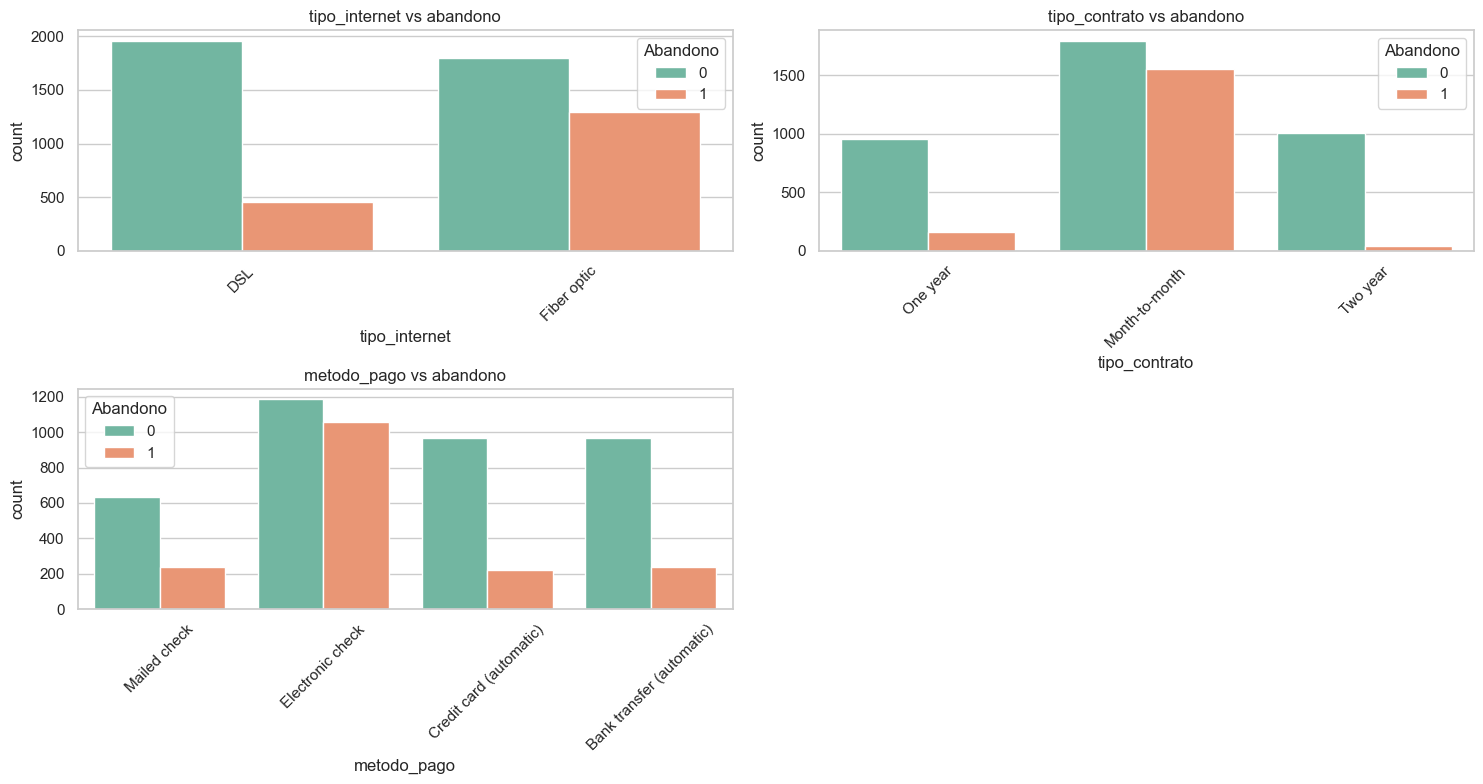

C:\Users\natal\AppData\Local\Temp\ipykernel_27048\708076778.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='abandono', y=col, palette='Set3', ax=axes[i])
C:\Users\natal\AppData\Local\Temp\ipykernel_27048\708076778.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='abandono', y=col, palette='Set3', ax=axes[i])
C:\Users\natal\AppData\Local\Temp\ipykernel_27048\708076778.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='abandono', y=col, palette='Set3', ax=axes[i])
C:\Users\natal\AppData\Local\Temp\

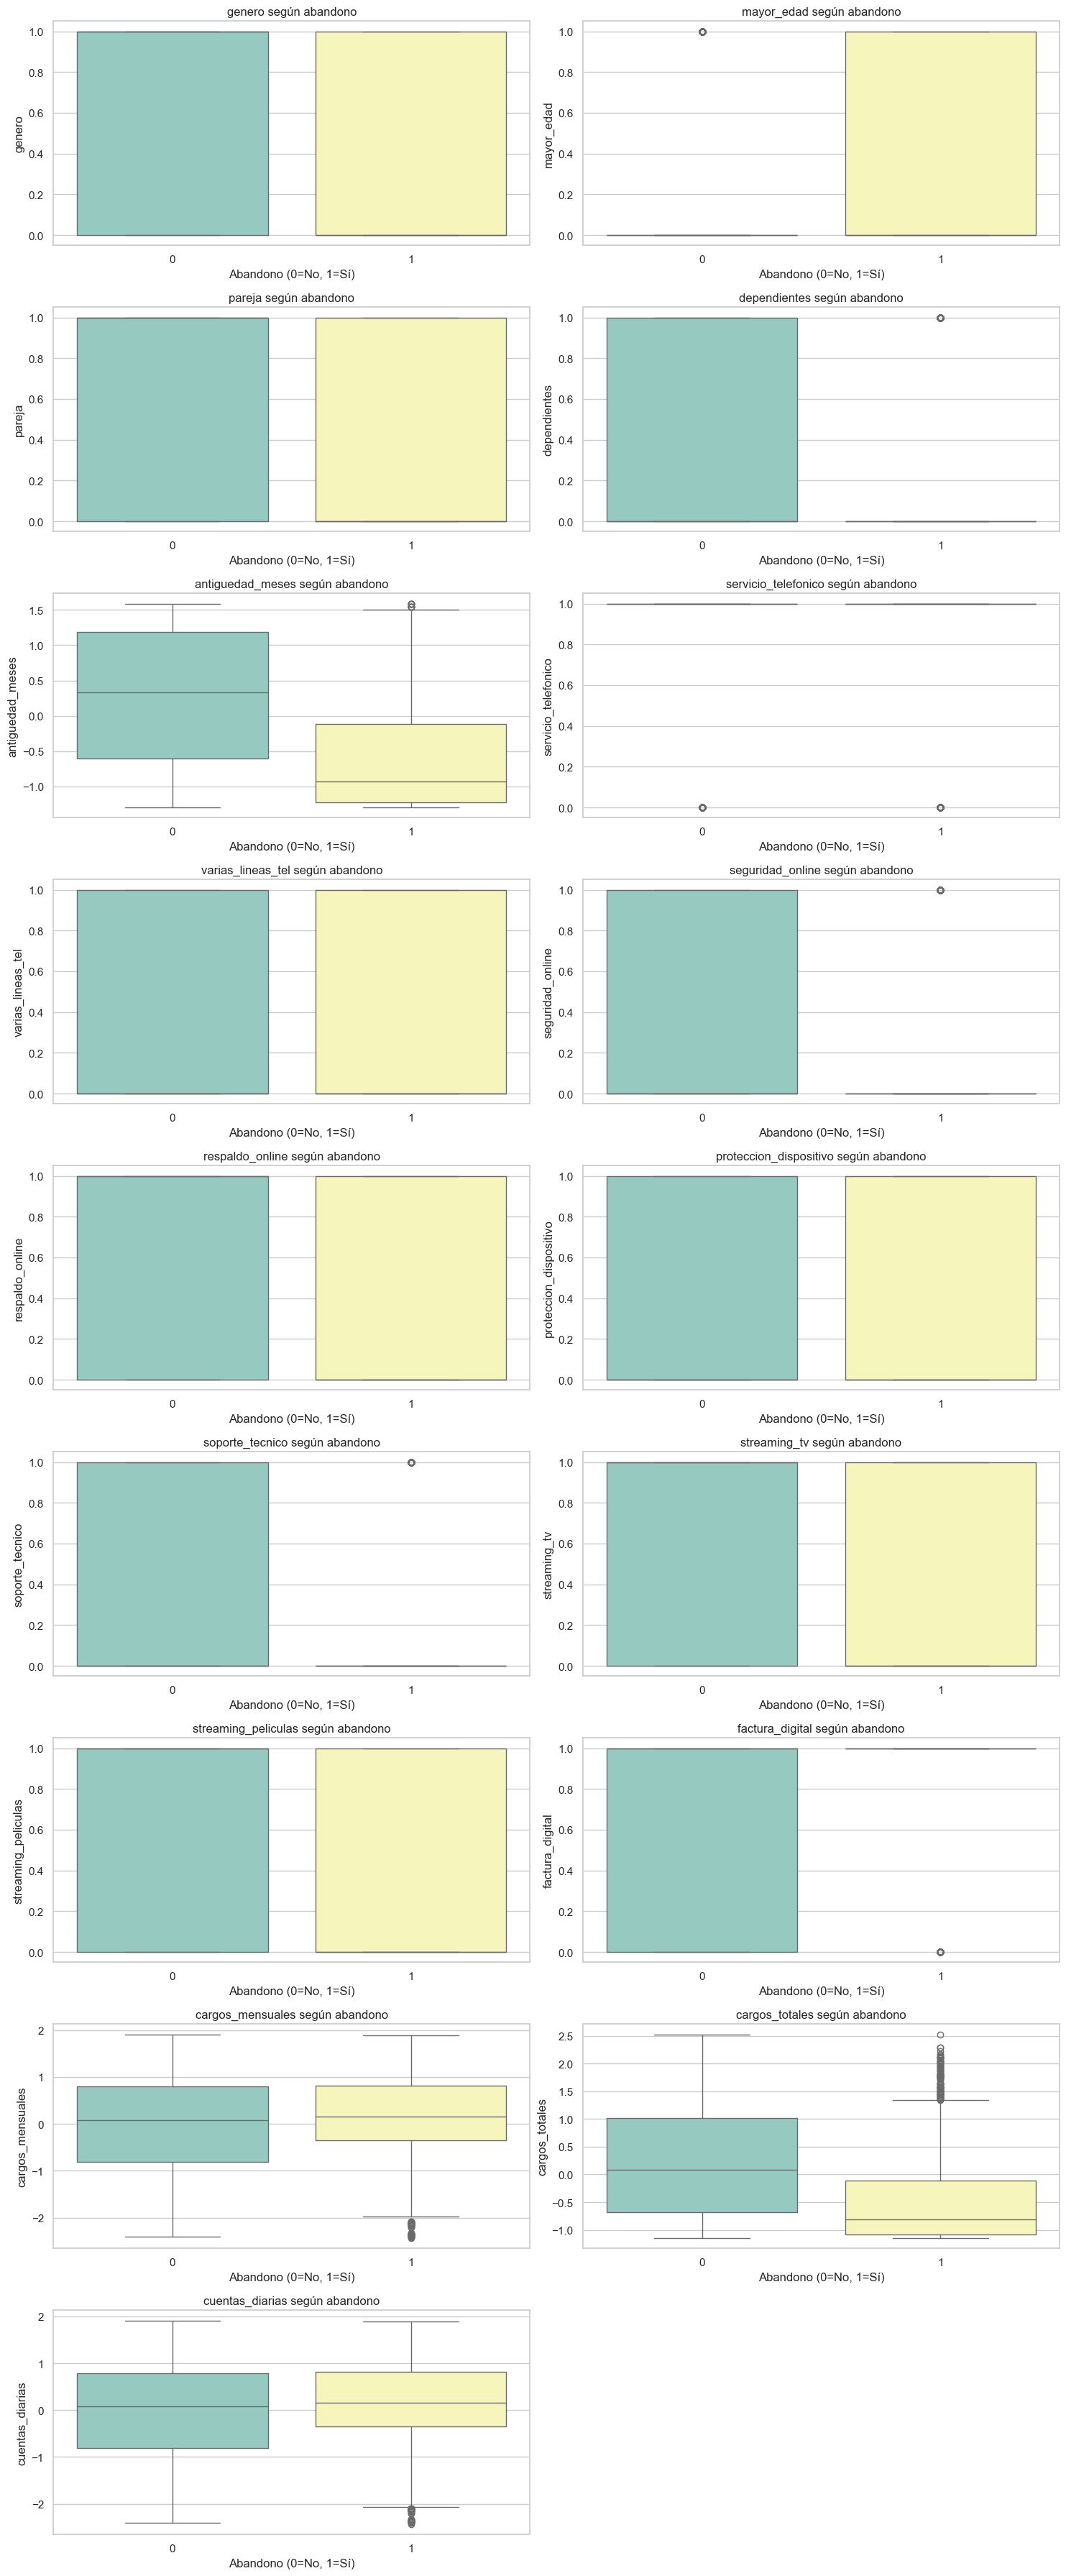

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos estilos
sns.set(style="whitegrid")

# 1. Variables
col_excluir = ['id_cliente', 'abandono']
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluir columnas innecesarias
categoricas = [col for col in categoricas if col not in col_excluir]
numericas = [col for col in numericas if col not in col_excluir]

# 2. Gráficos para categóricas
n_cols = 2
n_rows = -(-len(categoricas) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(data=df, x=col, hue='abandono', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs abandono')
    axes[i].legend(title='Abandono')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 3. Gráficos para numéricas
n_cols = 2
n_rows = -(-len(numericas) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numericas):
    sns.boxplot(data=df, x='abandono', y=col, palette='Set3', ax=axes[i])
    axes[i].set_title(f'{col} según abandono')
    axes[i].set_xlabel('Abandono (0=No, 1=Sí)')
    axes[i].set_ylabel(col)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

